# Volume 1: K-Means Clustering.
    <Name>
    <Class>
    <Date>

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D# You might want this for Problem 2.
%matplotlib inline
# from sklearn import datasets
# from sklearn import decomposition
import numpy as np

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [2]:
"""NOT WORKING"""

# # #run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

"""I can't get the iris data or sklearn to load no matter what I do to install it. Pip install sklearn,
    conda install sklearn, the works."""

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\magic\ACME\byu_vol1\KMeans\sklearn\__check_build:
setup.py                  _check_build.cp39-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [3]:
def coord2euc(dataset):
    dataspher=[]
    for i in range(len(dataset)):
        theta=np.deg2rad(dataset[i][0])
        phi=np.deg2rad(90-dataset[i][1])
        dataspher.append([np.cos(theta)*np.sin(phi), np.sin(theta)*np.sin(phi), np.cos(phi)])
    return np.array(dataspher)

def euc2coord(dataset):
    x=dataset[0]
    y=dataset[1]
    z=dataset[2]
    r=np.sqrt(x**2+y**2+z**2)
    phi=np.arccos(z/r)
    theta=np.arctan2(y,x)
    lat=np.rad2deg(theta)
    long=90-np.rad2deg(phi)
    return [lat,long]

In [62]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.normalize = normalize        # This is for Problem 2.
        self.p = p
        
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        
        data=X        
        self.centroids = {}          #Initialize empty centroid dictionary 
        iteration=0            
        for i in range(self.n_clusters):  #Iterate through the centroid dictionary
            self.centroids[i] = []          #Initiate each entry as an empty list
            self.centroids[i] = data[np.random.randint(0,data.shape[0]-1)] #change the ith entry to a random datapoint

        while iteration<self.max_iter:
#             if iteration%10==0:
#                 print("iteration",iteration)
            self.clusters = {}                 #Initiate empty clusters dictionary
            for i in range(self.n_clusters): 
                self.clusters[i] = []          #set the ith entry as an empty list
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid], ord=self.p) for centroid in self.centroids] #Calculate the distances between point and each centroid
                classification = distances.index(min(distances))  #Index of the smallest distance
                self.clusters[classification].append(features)    #Assign the point to the index of the nearest centroid

            prevcentroids=self.centroids.copy()   #Create copy of centroids
            
            for group in range(len(self.clusters)): 
                if self.clusters[group]==[]:      #If the entry is empty
                    self.centroids[group]=data[np.random.randint(0,data.shape[0]-1)] #Set that index centroid to something random
                elif self.normalize == True: 
                    top=np.average(self.clusters[group], axis = 0)  #Take the average of the group
                    bottom=np.linalg.norm(top, ord = self.p)        #take the norm of that average
                    self.centroids[group] = top/bottom              #divide the top by the bottom
                
                self.centroids[group] = np.average(self.clusters[group], axis = 0) #Take the new centroid to be the average of clusters
#             print('\n\n',"prevcentroids",prevcentroids,'\n\n')
#             print('\n\n',"centroids",self.centroids,'\n\n')
            
            isOptimal=True         #Assume it is optimal
            for i in range(len(self.centroids)):
                for j in range(len(self.centroids[i])):
                    if abs(self.centroids[i][j])-abs(prevcentroids[i][j])>self.tol:  #If each element is greater than the tolerance
                        isOptimal=False  #mark it as not optimal
            if isOptimal==True:    
                iteration=self.max_iter #If it's true max out iteration
#                 print("found optimal")
            else:
                iteration+=1
#             print("beginagain!")
#         print("all done!")
#         print(self.centroids,'\n\n',prevcentroids)
        return self
        
        

    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        data=X
        self.assignment = []  #initialize empty cluster assignment
        self.centroids= {}
        for i in range(self.n_clusters): #init centroids    
            self.centroids[i] = []
            self.centroids[i] = data[np.random.randint(0,data.shape[0]-1)]   
            
            
        for features in data:  #Assign each element to the nearest centroid
            distances = [np.linalg.norm(features - self.centroids[centroid], ord=self.p) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.assignment[classification].append(classification)
        return self
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
    #No instructions in the lab description
        
        return self.fit(X).predict(X)

In [46]:
# km=KMeans(12,p=100)
# X=np.load('./sacramento.npy')
# data=[]
# for i in range(len(X)):
#     data.append((X[i][6],X[i][7]))
# data=np.array(data)
# data.reshape(len(X),2)
# coord2euc(data)
# centers=km.fit(data)
# # print(centers.centroids)
# for i in range(len(km.centroids)):
# #     cent=euc2coord(km.centroids[i])
#     cent=km.centroids[i] 
#     plt.scatter(cent[0], cent[1],color='k', s = 130, marker = "+")

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

iteration 0
iteration 10
found optimal
all done!
{0: array([  38.556     , -121.37222222]), 1: array([  38.67925 , -121.267375]), 2: array([  38.62163636, -121.46636364]), 3: array([  38.49672727, -121.44272727]), 4: array([  38.67571429, -121.34415584]), 5: array([  38.59872727, -121.308     ]), 6: array([  38.52606061, -121.51606061]), 7: array([  38.55810345, -121.46310345]), 8: array([  38.60395833, -121.76166667]), 9: array([  38.68807692, -121.43307692]), 10: array([  38.41578947, -121.34842105]), 11: array([  38.61380282, -121.38633803])} 

 {0: array([  38.556     , -121.37222222]), 1: array([  38.67925 , -121.267375]), 2: array([  38.62163636, -121.46636364]), 3: array([  38.49672727, -121.44272727]), 4: array([  38.67571429, -121.34415584]), 5: array([  38.59872727, -121.308     ]), 6: array([  38.52606061, -121.51606061]), 7: array([  38.55810345, -121.46310345]), 8: array([  38.60395833, -121.76166667]), 9: array([  38.68807692, -121.43307692]), 10: array([  38.41578947, -1

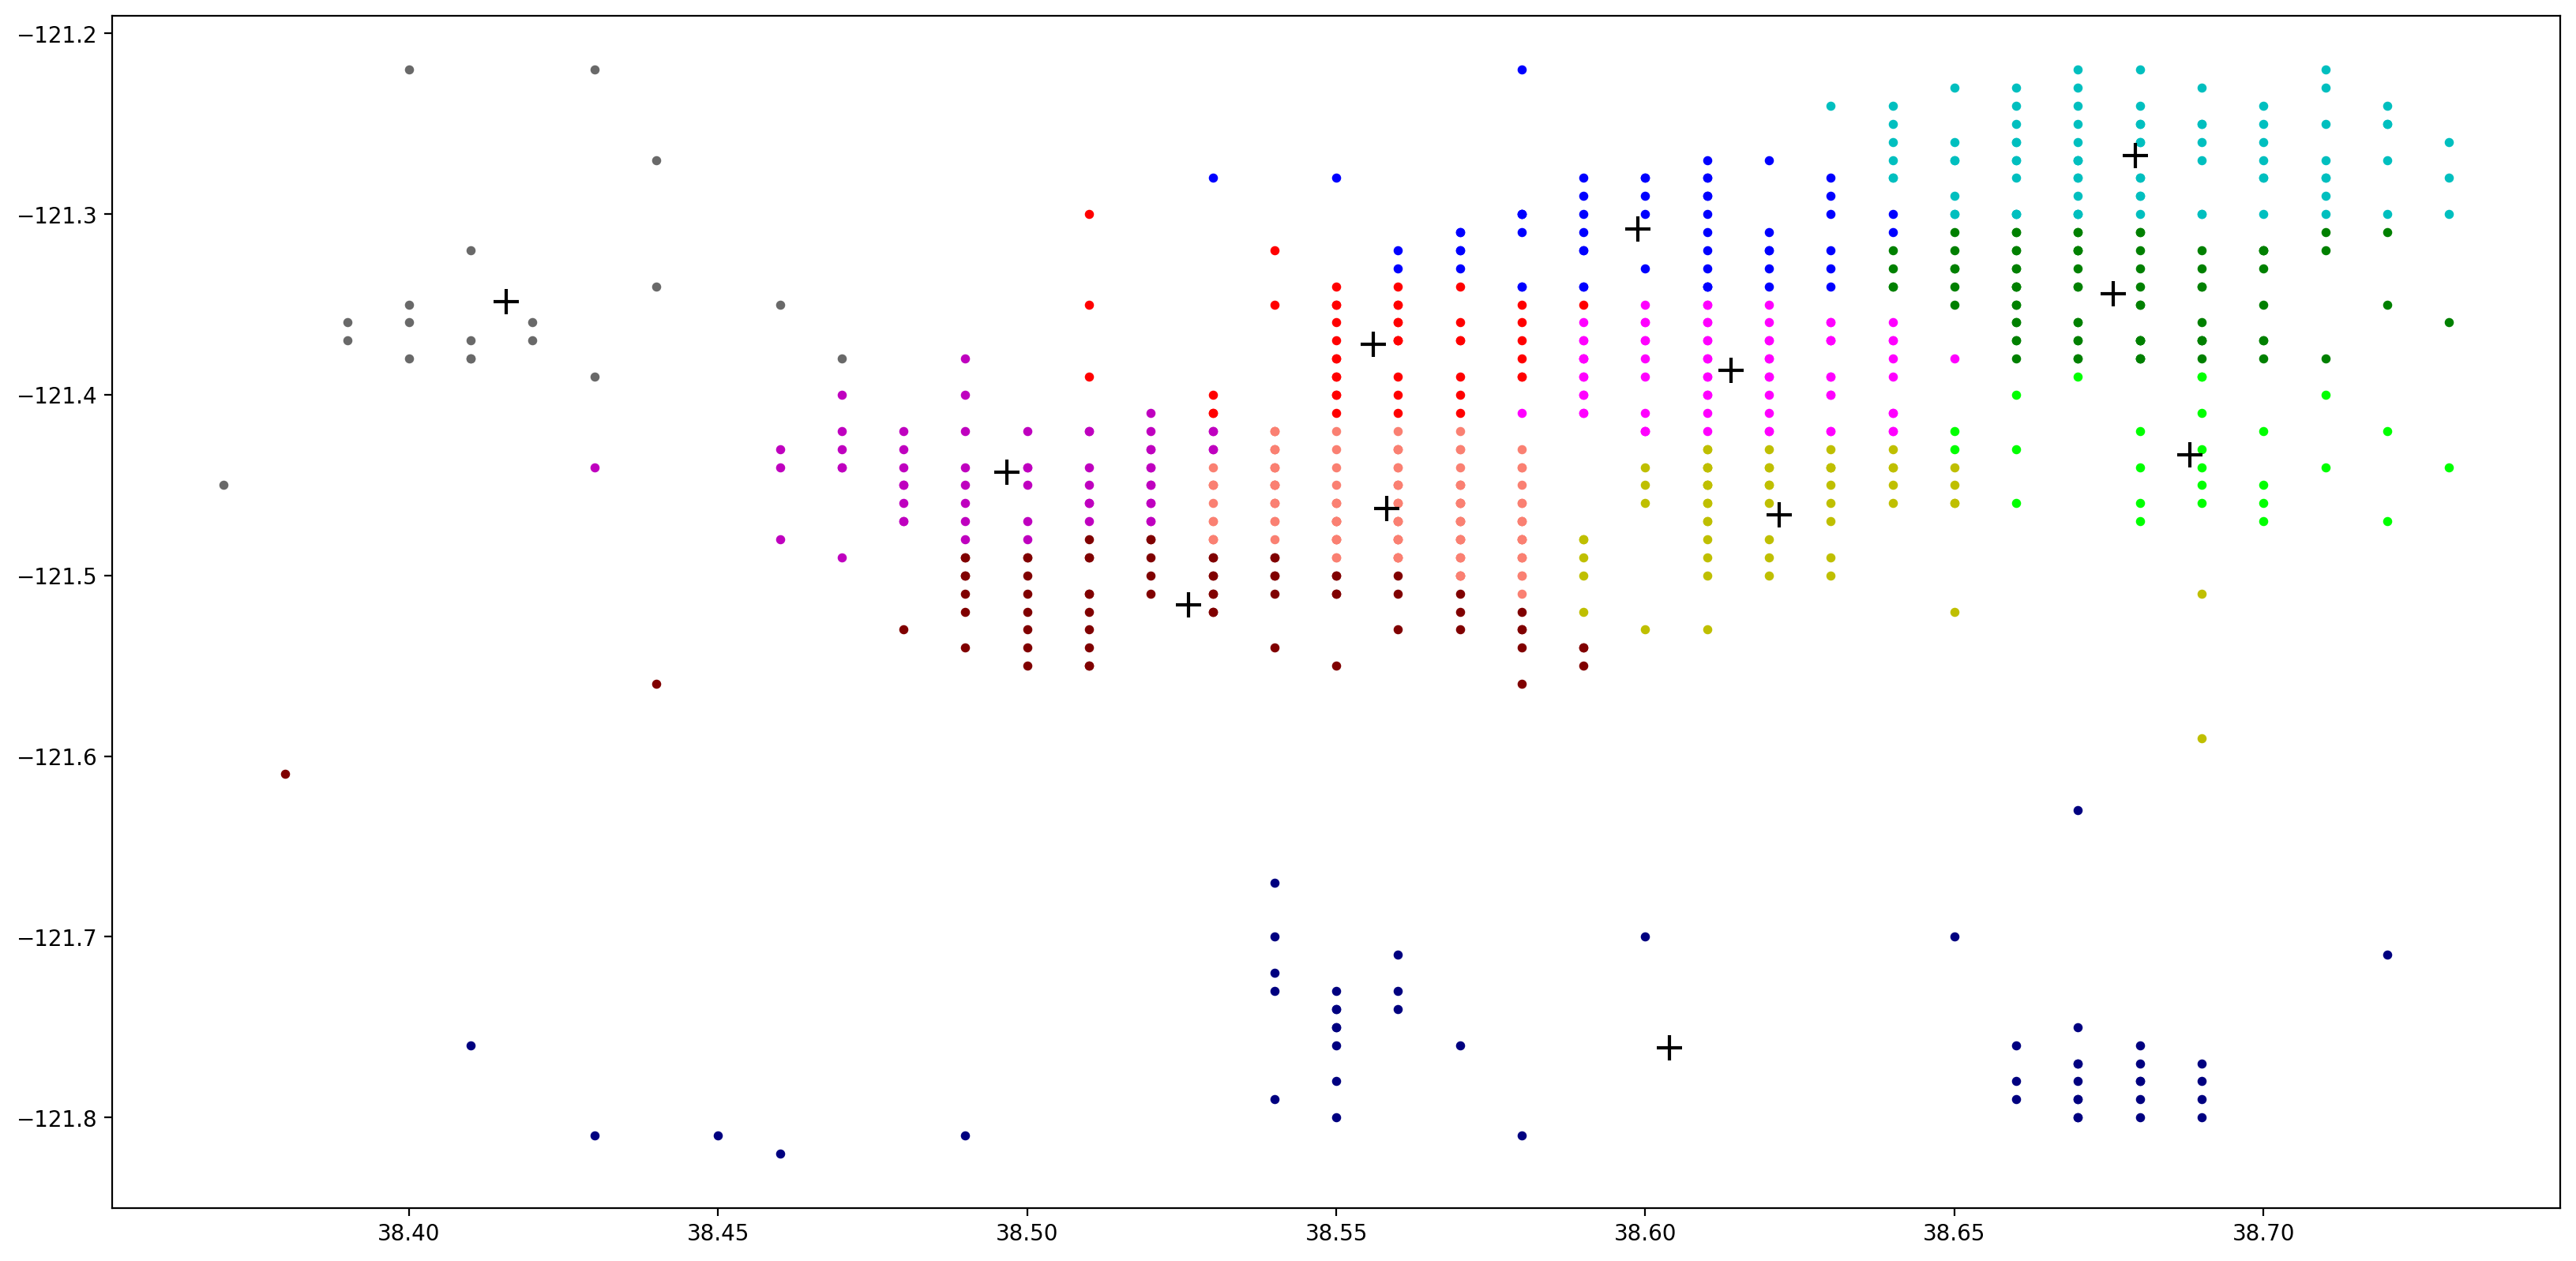

In [66]:
X = np.load('./sacramento.npy') #Load data
data=[]
for i in range(len(X)):
    data.append((X[i][6],X[i][7])) #Create a new dataset with only the coordinate data
data=np.array(data)
data.reshape(len(X),2) #Create column vectors
# data=coord2euc(data)
km=KMeans( n_clusters=12,normalize=True,p=3) #initialize KMeans object
km.fit(data) #Fit the data
# print('start with the graphing stuff')
colors = 10*["r","c","y","m","g","b","maroon","salmon","navy","lime","dimgrey","fuchsia","gold"]


"""Plot the colored points"""
for classification in km.clusters:  
    color = colors[classification]
    for features in km.clusters[classification]:
#         fnew=euc2coord(features)
        fnew=features
        plt.scatter(fnew[0], fnew[1], color = color,s = 10)
# print('plot centroids')
for i in km.centroids:
#     cent=euc2coord(km.centroids[i])
    cent=km.centroids[i]
    plt.scatter(cent[0], cent[1],color='k', s = 130, marker = "+")
plt.gcf().set_size_inches((20, 10))    
plt.show()

Give your explaination here
3! 3 is associated with the sphere thingy in the book.
If it's not 3 then it's infinity *Shrug emoji*

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

iteration 0
iteration 10
iteration 20
found optimal
all done!
{0: array([-0.6207145 ,  0.76068888,  0.01016292]), 1: array([ 0.33786581, -0.87210163,  0.29302786]), 2: array([-0.53409151, -0.14652344,  0.81527949]), 3: array([-0.5381168 ,  0.60954498,  0.51546532]), 4: array([ 0.59347629, -0.09168661, -0.70659544]), 5: array([ 0.25173202, -0.53670842,  0.71207994]), 6: array([-0.05022129,  0.95135895, -0.0183998 ]), 7: array([-0.33880424, -0.75025957,  0.54688154]), 8: array([0.43491801, 0.5841657 , 0.56588077]), 9: array([ 0.2409339 , -0.77680806, -0.57933565]), 10: array([-0.33060875, -0.65652914, -0.59253209]), 11: array([-0.91365867,  0.32490712, -0.19316139]), 12: array([-0.65879908,  0.14797991, -0.68338268]), 13: array([-0.91711856, -0.05576603, -0.37962731]), 14: array([ 0.2883924 , -0.90072506, -0.27565526])} 

 {0: array([-0.6207145 ,  0.76068888,  0.01016292]), 1: array([ 0.33786581, -0.87210163,  0.29302786]), 2: array([-0.53409151, -0.14652344,  0.81527949]), 3: array([-0.

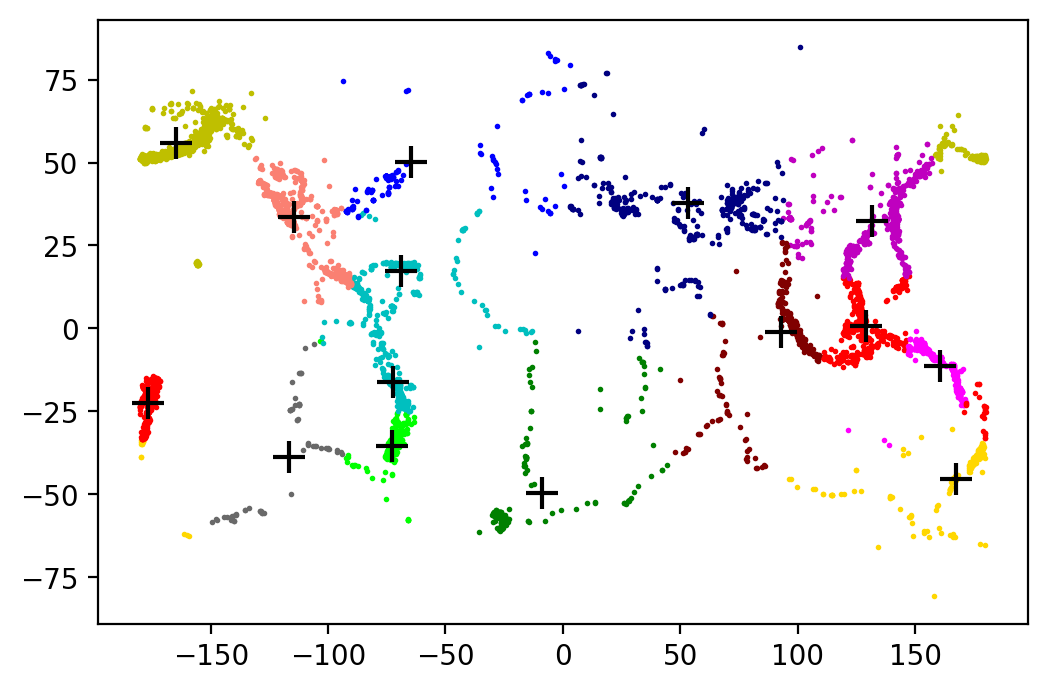

<Figure size 4000x4000 with 0 Axes>

In [57]:
data = np.load('./earthquake_coordinates.npy')
data=coord2euc(data)
km=KMeans(15,normalize=True,tol=1e-3,p=np.inf)
km.fit(data)
# print('start with the graphing stuff')
colors = 10*["r","c","y","m","g","b","maroon","salmon","navy","lime","dimgrey","fuchsia","gold"]


for classification in km.clusters:
    color = colors[classification]
    for features in km.clusters[classification]:
        fnew=euc2coord(features)
        plt.scatter(fnew[0], fnew[1], color = color,s = 1)
# print('plot centroids')
for i in range(len(km.centroids)):
    cent=euc2coord(km.centroids[i])

    plt.scatter(cent[0], cent[1],color='k', s = 130, marker = "+")
plt.figure(figsize=(20,20))
plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [ ]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")